##Sarvesh Gaonkadkar 21102B0001 CMPN-B Batch1 ML-Expt6

### 1. Data Preparation:
* Wine Quality Dataset (Classification Task):
  1. Load the dataset from here.
  2. Explore the dataset (check for missing values, data types, etc.).
  3. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine Quality dataset
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Explore the dataset
print(wine_data.head())
print(wine_data.info())

# Check unique values in the target variable
print("Unique quality values:", wine_data['quality'].unique())

# Convert the target variable to integer type if needed
wine_data['quality'] = wine_data['quality'].astype(int)

# Split the dataset into features (X) and target (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

* Concrete Compressive Strength Dataset (Regression Task):
1. Load the dataset from here.
2. Perform the same exploratory analysis as for the classification task.
3. Split the dataset into training and testing sets.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Concrete Compressive Strength dataset
concrete_data = pd.read_csv("/content/Concrete_Data.csv")

# Explore the dataset
print(concrete_data.head())
print(concrete_data.info())

# Strip spaces from column names if necessary
concrete_data.columns = concrete_data.columns.str.strip()

# Split the dataset into features (X) and target (y)
X = concrete_data.drop('Concrete compressive strength(MPa, megapascals)', axis=1)  # Adjust as necessary
y = concrete_data['Concrete compressive strength(MPa, megapascals)']  # Adjust as necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Standardize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

### 2. Implement SVM Models:
* Classification:
1. Use SVC from the sklearn.svm library.
2. Train the classifier using the training set.
3. Use the model to predict the target variable for the test set.

Accuracy: 0.559375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.77      0.68       130
           6       0.51      0.60      0.55       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.19      0.23      0.20       320
weighted avg       0.46      0.56      0.50       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

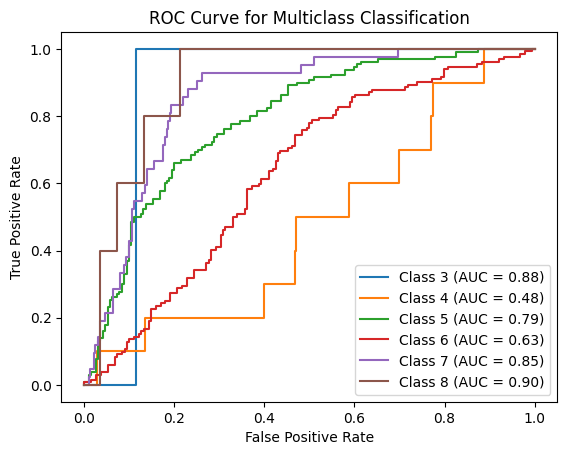

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Create and train the SVM classifier
classifier = SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Calculate additional performance metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Binarize the labels for multiclass case
classes = np.unique(y_train)  # Get unique classes from training labels
y_test_binarized = label_binarize(y_test, classes=classes)

# Get predicted probabilities for each class
y_prob = classifier.predict_proba(X_test)

# Calculate ROC-AUC for multiclass
roc_auc = roc_auc_score(y_test_binarized, y_prob, average='weighted', multi_class='ovr')

# Plot ROC curve for each class
plt.figure()
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

* Regression:
1. Use SVR from the sklearn.svm library.
2. Train the regressor on the training data.
3. Predict the target variable for the testing set.

Mean Squared Error: 0.39663419885253093
R-squared: 0.3930671115453136


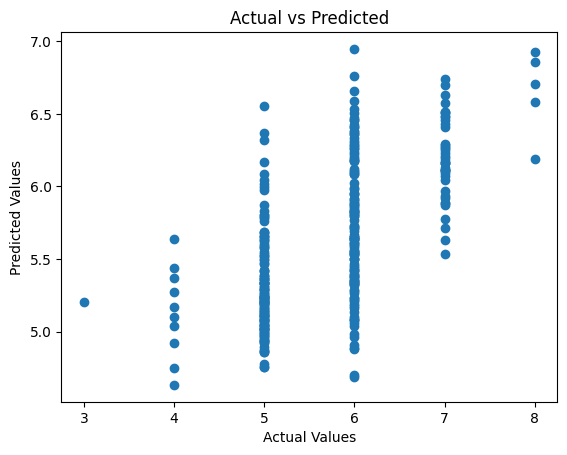

In [29]:
# Import necessary libraries for SVM regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the SVM regressor
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

### 3. Performance Metrics:
* Classification: Calculate accuracy, precision, recall, F1-score, and ROC-AUC.

In [13]:
# Print performance metrics for classification
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.5594
Precision: 0.4563
Recall: 0.5594
F1-score: 0.5024
ROC-AUC: 0.7259


* Regression: Calculate Mean Squared Error (MSE) and R-squared.

In [30]:
# Print performance metrics for regression
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.3966
R-squared: 0.3931


###4. Analysis and Interpretation
* Classification Analysis:

In [31]:
# Classification analysis
print("\n--- Classification Analysis ---")
if precision > recall:
    print("Precision is higher than Recall: The model may miss too many true positives (i.e., it's conservative in predicting positives).")
else:
    print("Recall is higher than Precision: The model predicts more true positives, but also includes more false positives.")

if f1 > 0.8:
    print("Good balance between precision and recall, indicating well-performing model.")
else:
    print("F1-score is lower, consider improving the balance between precision and recall.")


--- Classification Analysis ---
Recall is higher than Precision: The model predicts more true positives, but also includes more false positives.
F1-score is lower, consider improving the balance between precision and recall.


* Regression Analysis:

In [32]:
# Regression analysis
print("\n--- Regression Analysis ---")
if mse > 10:  # Example threshold for high MSE
    print("The Mean Squared Error is high, indicating a large deviation between predicted and actual values.")
else:
    print("The Mean Squared Error is reasonable, indicating the model is making accurate predictions.")

if r2 < 0.5:
    print("The R-squared value is low, indicating the model is not explaining much variance in the data.")
else:
    print("The R-squared value is good, indicating the model is explaining a significant portion of the variance in the data.")


--- Regression Analysis ---
The Mean Squared Error is reasonable, indicating the model is making accurate predictions.
The R-squared value is low, indicating the model is not explaining much variance in the data.
